In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from cnn import CNN

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

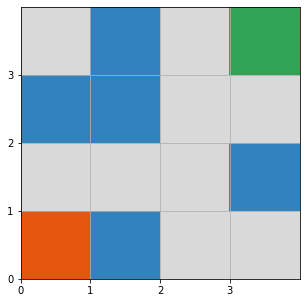

In [3]:
env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=100,
    img_state=True,
    greyscale=True,
    img_size=(64, 64),
)

In [4]:
target_net = CNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

policy_net = CNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

dqn = DQN(
    env=env,
    log_freq=10,
    train_freq=3,
    batch_size=10,
    w_sync_freq=10,
    memory_size=100,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=400,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_cnn',
)

dqn.run()

Episode: 0, Reward: -75.55, Loss: 0
Episode: 10, Reward: -4.649999999999999, Loss: 22.362125396728516
Episode: 20, Reward: -29.5, Loss: 17.356653213500977
Episode: 30, Reward: -130.59999999999994, Loss: 23.922260284423828
Episode: 40, Reward: -41.500000000000014, Loss: 16.891931533813477
Episode: 50, Reward: -187.54999999999998, Loss: 23.94708824157715
Episode: 60, Reward: -43.60000000000001, Loss: 4.2316741943359375
Episode: 70, Reward: -16.20000000000001, Loss: 8.497234344482422
Episode: 80, Reward: 0.4500000000000002, Loss: 3.176697015762329
Episode: 90, Reward: -40.2, Loss: 4.102102756500244
Episode: 100, Reward: -11.950000000000003, Loss: 2.3404598236083984
Episode: 110, Reward: -12.000000000000004, Loss: 3.790154218673706
Episode: 120, Reward: 4.75, Loss: 0.22892412543296814
Episode: 130, Reward: -10.200000000000001, Loss: 0.7295549511909485
Episode: 140, Reward: 4.75, Loss: 2.358588933944702
Episode: 150, Reward: -22.15, Loss: 3.1398329734802246
Episode: 160, Reward: 4.75, Loss:

In [5]:
_, action_seq = dqn.evaluate_one_episode()
dqn.env.animate(action_seq=action_seq, filename='dqn_cnn.mp4')
Video('dqn_cnn.mp4')

In [6]:
dqn.evaluate()

#### Training

Text(0.5, 1.0, 'Epsilon decay per episode')

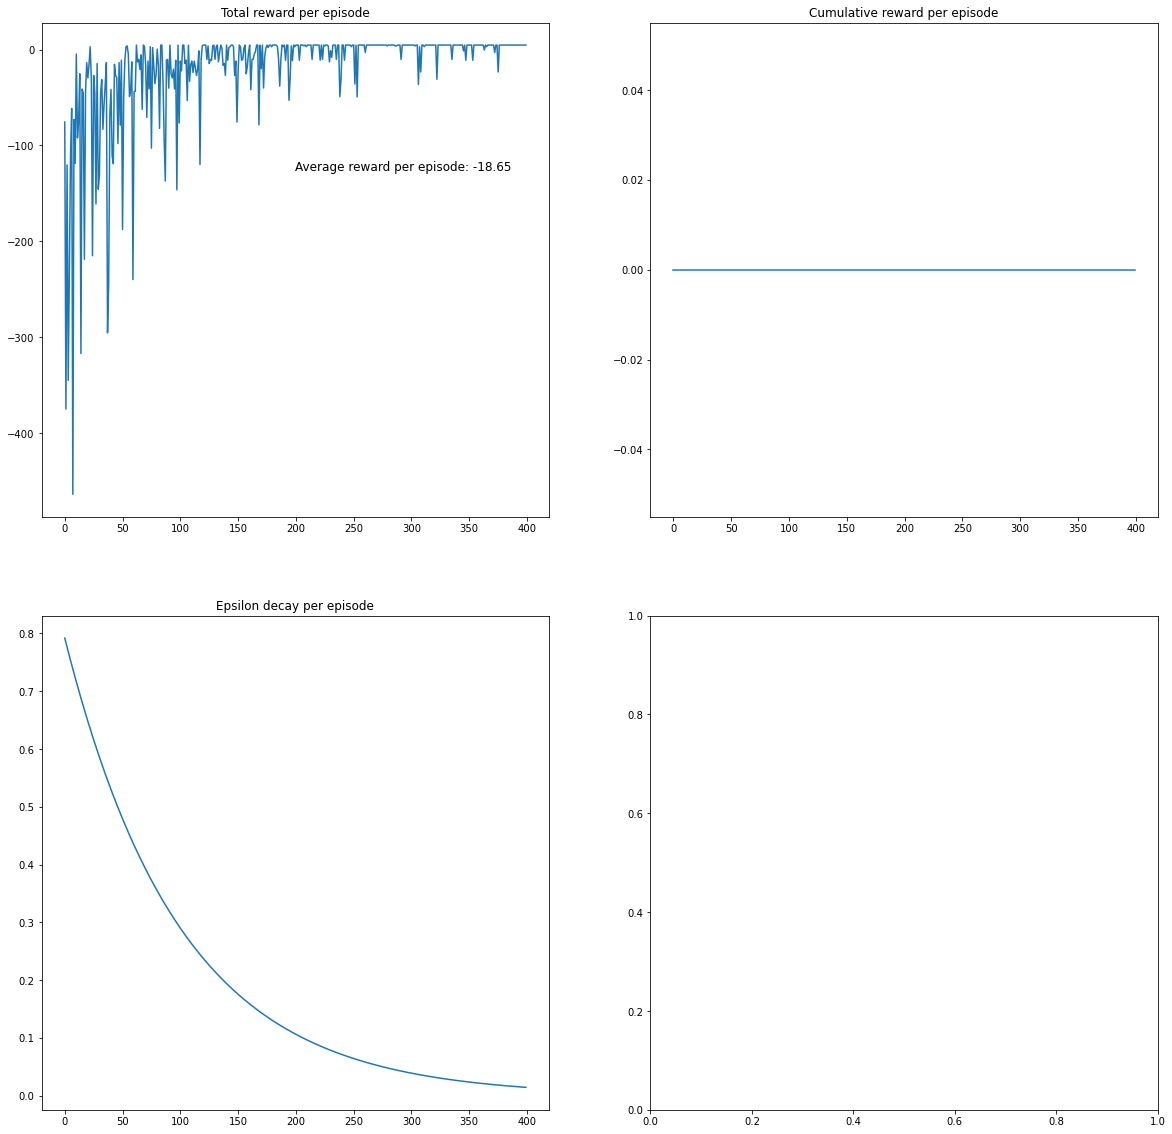

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

#### Evaluation

Text(0.5, 1.0, 'Cumulative reward per episode')

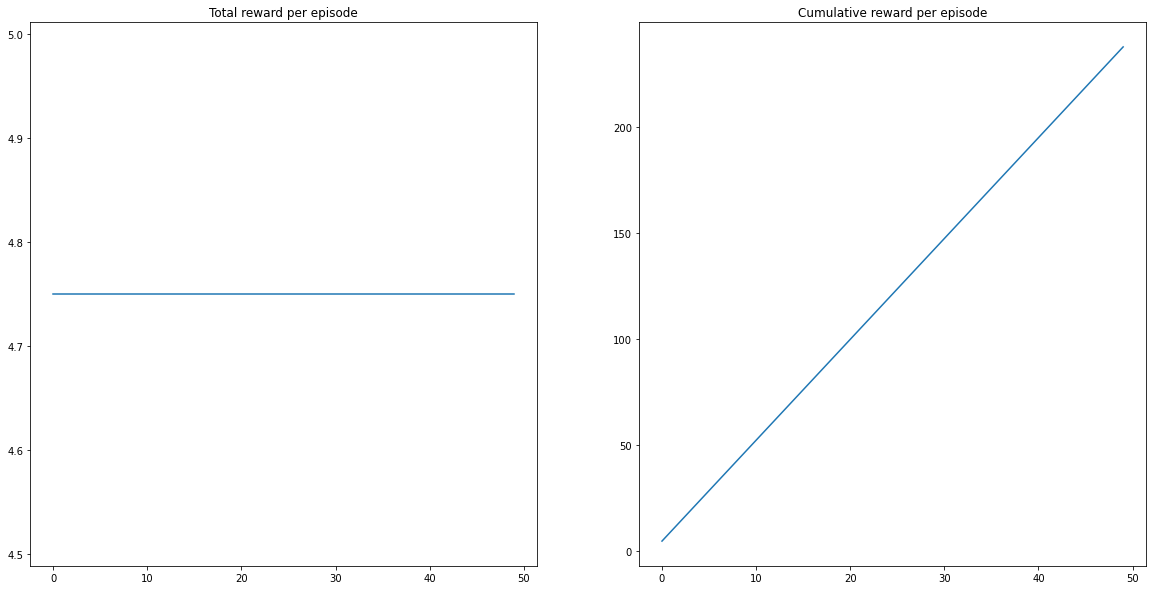

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(range(dqn.eval_episodes), [log['reward'] for _, log in dqn.eval_logs.items()])
ax[0].set_title('Total reward per episode')

ax[1].plot(range(dqn.eval_episodes), [log['cumulative_reward'] for _, log in dqn.eval_logs.items()])
ax[1].set_title('Cumulative reward per episode')